The MNIST dataset—shown in the banner image for this post—is the bread and butter of deep learning. Just as many programmers begin their journey by learning to output the iconic "[Hello, World!](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program)", the majority of deep learning enthusiasts likely spent their formative days working with the MNIST dataset. This prevalence is evident through its frequent use in introductory tutorials on deep learning, the benchmarking of new neural network architectures, and company PR showcases attempting to demonstrate (often misguidedly) their data-science-savviness.

## A Case Against MNIST

For those uninitiated, the typical goal associated with this data set is to create a machine learning model that can be trained on the first 60,000 images along with their corresponding labels, and then use the knowledge gleaned from this process to predict the labels of the remaining 10,000 unseen images. This can be achieved using a wide range of machine learning algorithms, but deep learning is a tool particularly well-equipped for the task, and so MNIST's dominance in the deep learning landscape naturally arose. The problem is, the world of deep learning has changed substantially since the original inception of the dataset; we have more efficient algorithms and more computational power to leverage. This leaves us in an awkward position where it now takes little effort to obtain a seemingly impressive score. In fact, with just a few dozen lines of code and a few minutes to train a model, it is possible to train a neural network classifier with up to 98% accuracy on the dataset.

In my opinion, this tendency towards using such a simple data set for teaching and evaluation might be a minor detriment to the learning and development of new deep learning practitioners. It's as if you tried to teach IT skills in the modern world by focusing on how to install programs. In the early days of computer science, the act of setting up software was arduous—sourcing dependencies, defining compilation options, and building binaries—and, due to the limited scope of these devices, occupied more of what would be considered standard usage. Yet, the modern day equivalent is as simple as clicking download, install, and blindly clicking 'I agree'. Instead, IT tuition has adapted to the improved simplicity of modern operating systems to now focus on tasks that would have been deemed too challenging a few decades ago. I propose the same transformation needs to occur in deep learning, with a movement away form the MNIST dataset towards challenges more appropriate for our modern toolset and computational power.

### Impacts of MNIST

But what actual harm could come from reliance on the MNIST dataset for initial explorations into deep learning? I would argue that there are two key dangers. The first is that the MNIST dataset paints an unrealistic image of how simplistic the field of deep learning can be. Within reason, no matter how you design your neural network architecture, it is likely that will obtain impressive accuracy metrics after just a short round of training. When moving on from the MNIST dataset, however, this can induce a shock to the system, potentially leading to feelings of disappointment and spurring a withdrawal from the field. I would argue that closing this gap between the introductory step and more involved work might make it less likely for people to be put off deep learning without moving beyond their initial foray into the field. The second characteristic of the MNIST dataset that I find disagreeable is that it leaves very little room for thought or experimentation. When a simple, introductory model can obtain an accuracy of up to 98% on a dataset, it offers little motivation to dig deeper and explore possible improvements. Even if you did have the drive to search for these small performance gains, you'll find that the major limiting factor in that final 2% is illegible handwriting or misclassified examples, two issues that cannot be fixed by model improvement. On the other hand, a deep learning dataset that only lends itself to modest accuracies when paired with introductory models is more likely to inspire innovation or act as an anchor for the discussion of more advanced deep learning techniques—data augmentation, semi-supervised learning, transfer learning, and the likes.

I will rest my case at this point. Perhaps I haven't convinced you that the MNIST dataset is all that bad, but at the very least, I hope we can agree that some alternatives wouldn't go amiss. I wish to spend the rest of this post discussing two ideas in more depth. The first regards placing emphasis on the excessive simplicity of the dataset by showing how much predictive power you can leverage from just one image pixel. The second will consist of some alternatives to the MNIST data, offering fundamentally equivalent learning problems, but with some added complexity and scope for exploration.

## The Power of a Pixel

The 70,000 images in the MNIST dataset are each composed of $28\times28$ pixels. To really drive home the simplicity of the predictive task associated with the MNIST dataset, I will throw the majority of these away and instead ask, "for any pair of digits, how accurately can we distinguish between the two classes using only one of the 784 pixels". That is, for each pair of digits, I will find the single pixel that has the most predictive power in distinguishing between the two classes. This only takes a few lines of code and a handful of minutes to run. The results can be seen in the following graphic.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = pd.read_csv("data/mnist.csv", header=None, dtype=np.uint8)

# split into image and labels
X = mnist.drop(0, axis=1).to_numpy()
y = mnist[0].to_numpy()

In [81]:
accuracies = np.empty((10, 10), dtype=np.float)
choices = [[None for j in range(10)] for i in range(10)]
for low_lab in range(9):
    for high_lab in range(low_lab + 1, 10):
        # subset training data to labels of interest
        low_arr = X_train[y_train == low_lab]
        high_arr = X_train[y_train == high_lab]
        # keep track of best pixel accuracy
        best_acc = None
        best_p = None
        for p in range(784):
            # count occurances of each pixel value
            low_cnts = np.zeros(256, dtype=np.uint16)
            for z in low_arr[:, p]:
                low_cnts[z] += 1
            high_cnts = np.zeros(256, dtype=np.uint16)
            for z in high_arr[:, p]:
                high_cnts[z] += 1
            # calculate accuracy
            correct = 0
            incorrect = 0
            for z in range(256):
                correct += max(low_cnts[z], high_cnts[z])
                incorrect += min(low_cnts[z], high_cnts[z])
            acc = correct / (correct + incorrect)
            if best_acc is None or acc > best_acc:
                best_acc = acc
                best_p = p
        accuracies[low_lab, high_lab] = best_acc
        choices[low_lab][high_lab] = \
            f"({best_p // 28 + 1}, {best_p % 28 + 1})"

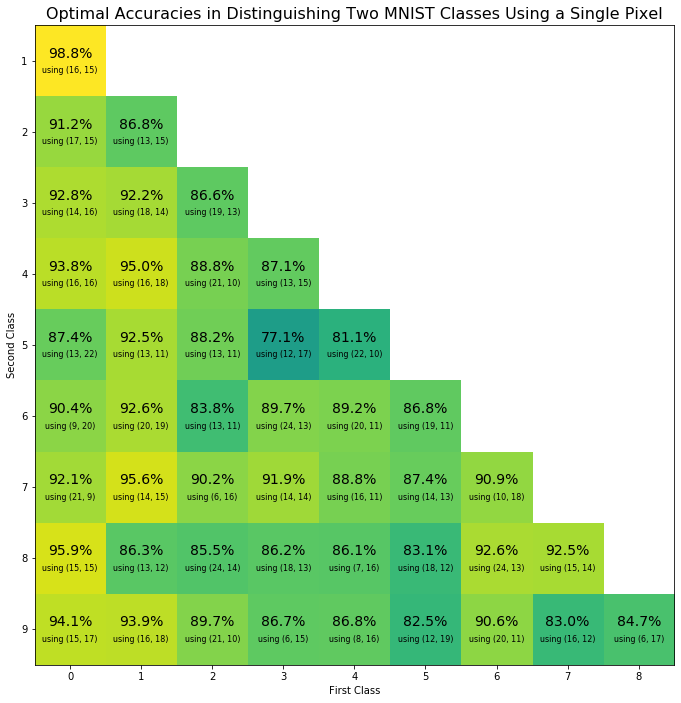

In [121]:
fig, ax = plt.subplots(figsize=(10, 10))
masked_accuracies = np.ma.masked_where(np.triu(np.ones((10, 10))),
                                       np.transpose(accuracies))[1:, :9]
im = ax.imshow(masked_accuracies, vmin = .5)

ax.set_xticks(range(9))
ax.set_yticks(range(9))
ax.set_xticklabels(range(9))
ax.set_yticklabels(range(1, 10))
ax.set_xlabel('First Class')
ax.set_ylabel('Second Class')

# add annotations
for i in range(9):
    for j in range(i+1, 10):
        ax.text(i, j-1-0.1, str(round(accuracies[i, j] * 100, 1)) + "%",
                ha="center", va="center", fontsize=14, color="k")
        ax.text(i, j-1+0.14, "using " + choices[i][j],
                ha="center", va="center", color="k", fontsize=8)

ax.set_title("Optimal Accuracies in Distinguishing Two MNIST Classes Using a Single Pixel",
            fontsize=16)
fig.patch.set_facecolor('white')
fig.tight_layout()
plt.show()

As an example, if you wished to distinguish the images of the digits 2 and 4, by using just the pixel at coordinates $(21, 10)$, you could achieve an accuracy of $88.8\%$. The pair of classes that are hardest to separate is 3 and 5 with an optimal accuracy of $77.1\%$ and the easiest pair is 0 and 1 with $99.8\%$. The fact that even the toughest of these pairs can still be distinguished with reasonable accuracy (the rest being even easier to classify) is rather shocking. This highlights my point that the MNIST dataset is not fit for purpose when paired with deep learning algorithms. For applications involving KNN, SVMs, RFs, and in this case, a brute-force pixel model, the dataset is more appropriate, but for models as complex and powerful as neural network, I believe we should consider other possibilities.

## Looking Elsewhere

This post naturally leads us to question what alternatives there are available for the MNIST dataset. Luckily, there are a few, all of which offer a fundamentally equivalent problem to solve, but with the added complexity we so desire. Here is collection of my favourites (although a well-filtered search on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/) will bring up many more examples):

* [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)—the more stylish cousin of the standard MNIST dataset. Composed of the same quantity of images split over the same number of classes, this dataset differs from the MNIST dataset only in that the images consist of items of clothing rather than handwritten. The difficulty of this dataset is only a mild step up from the traditional MNIST, yet it offers far more room for exploration.
* [Kizushiji MNIST](https://github.com/rois-codh/kmnist)—in a similar vein, the Kuzushiji MNIST dataset offers another experience parallel to the original MNIST dataset, focused instead on the identification of a selection of Japanese characters. If this isn't enough of a challenge for you though, extensions of the dataset featuring 49 and 3832 classes respectively are also available, the latter of which at a higher $64\times64$ pixel resolution. 
* [EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset)—an extension of the existing MNIST dataset to included the majority of alphabetic characters.
* [Quickdraw](https://github.com/googlecreativelab/quickdraw-dataset)—if you really want to push yourself, Google have open-sourced the doodling-data they collect from their website [Quickdraw](https://quickdraw.withgoogle.com/). The breadth of the dataset means that obtaining impressive accuracies may be a challenge, but there's no harm in trying (after all, all it takes is a few adaptations to an existing MNIST model and some more training).

With these datasets ready and waiting, go out and explore. Further, the next time you come across a benchmark or tutorial based on the MNIST dataset, give it a whirl on these alternatives too. Who knows, the added challenge might just be the birth of new inspiration.